In [ ]:
import uproot
 
file_path = "/home/sandeep/Desktop/Zjets.root"  

f = uproot.open(file_path)

print("Keys in file:", f.keys())

tree = f["Delphes"]
print("Branches in Delphes tree:")
for branch in tree.keys():
    print(branch)


Keys in file: ['ProcessID0;1', 'ProcessID1;1', 'ProcessID2;1', 'ProcessID3;1', 'ProcessID4;1', 'ProcessID5;1', 'ProcessID6;1', 'ProcessID7;1', 'ProcessID8;1', 'ProcessID9;1', 'ProcessID10;1', 'ProcessID11;1', 'ProcessID12;1', 'ProcessID13;1', 'ProcessID14;1', 'ProcessID15;1', 'ProcessID16;1', 'ProcessID17;1', 'ProcessID18;1', 'ProcessID19;1', 'Delphes;1']
Branches in Delphes tree:
Event
Event/Event.fUniqueID
Event/Event.fBits
Event/Event.Number
Event/Event.ReadTime
Event/Event.ProcTime
Event/Event.ProcessID
Event/Event.MPI
Event/Event.Weight
Event/Event.CrossSection
Event/Event.CrossSectionError
Event/Event.Scale
Event/Event.AlphaQED
Event/Event.AlphaQCD
Event/Event.ID1
Event/Event.ID2
Event/Event.X1
Event/Event.X2
Event/Event.ScalePDF
Event/Event.PDF1
Event/Event.PDF2
Event_size
Weight
Weight/Weight.fUniqueID
Weight/Weight.fBits
Weight/Weight.Weight
Weight_size
Particle
Particle/Particle.fUniqueID
Particle/Particle.fBits
Particle/Particle.PID
Particle/Particle.Status
Particle/Particle

In [28]:

tree = f["Delphes"]

branches = tree.keys()

jet_branches      = [b for b in branches if b.startswith("Jet")]
electron_branches = [b for b in branches if b.startswith("Electron")]
muon_branches     = [b for b in branches if b.startswith("Muon")]
met_branches      = [b for b in branches if b.startswith("MissingET")]

print("Jets:", jet_branches)
print("Electrons:", electron_branches)
print("Muons:", muon_branches)
print("MET:", met_branches)


Jets: ['JetPUPPIAK8', 'JetPUPPIAK8/JetPUPPIAK8.fUniqueID', 'JetPUPPIAK8/JetPUPPIAK8.fBits', 'JetPUPPIAK8/JetPUPPIAK8.PT', 'JetPUPPIAK8/JetPUPPIAK8.Eta', 'JetPUPPIAK8/JetPUPPIAK8.Phi', 'JetPUPPIAK8/JetPUPPIAK8.T', 'JetPUPPIAK8/JetPUPPIAK8.Mass', 'JetPUPPIAK8/JetPUPPIAK8.DeltaEta', 'JetPUPPIAK8/JetPUPPIAK8.DeltaPhi', 'JetPUPPIAK8/JetPUPPIAK8.Flavor', 'JetPUPPIAK8/JetPUPPIAK8.FlavorAlgo', 'JetPUPPIAK8/JetPUPPIAK8.FlavorPhys', 'JetPUPPIAK8/JetPUPPIAK8.BTag', 'JetPUPPIAK8/JetPUPPIAK8.BTagAlgo', 'JetPUPPIAK8/JetPUPPIAK8.BTagPhys', 'JetPUPPIAK8/JetPUPPIAK8.TauTag', 'JetPUPPIAK8/JetPUPPIAK8.TauWeight', 'JetPUPPIAK8/JetPUPPIAK8.Charge', 'JetPUPPIAK8/JetPUPPIAK8.EhadOverEem', 'JetPUPPIAK8/JetPUPPIAK8.NCharged', 'JetPUPPIAK8/JetPUPPIAK8.NNeutrals', 'JetPUPPIAK8/JetPUPPIAK8.NeutralEnergyFraction', 'JetPUPPIAK8/JetPUPPIAK8.ChargedEnergyFraction', 'JetPUPPIAK8/JetPUPPIAK8.Beta', 'JetPUPPIAK8/JetPUPPIAK8.BetaStar', 'JetPUPPIAK8/JetPUPPIAK8.MeanSqDeltaR', 'JetPUPPIAK8/JetPUPPIAK8.PTD', 'JetPUPPIAK8/Je

In [36]:
file_zjets   = "/home/sandeep/Desktop/Zjets.root"
file_qcd     = "/home/sandeep/Desktop/qcd.root"
file_higgs2p = "/home/sandeep/Desktop/higgs2p.root"


In [37]:
import uproot
import numpy as np

def load_ak8_mass(filepath):
    tree = uproot.open(filepath)["Delphes"]
    mass = tree["JetPUPPIAK8/JetPUPPIAK8.Mass"].array(library="np")
    return np.concatenate(mass)

def load_ak8_pt(filepath):
    tree = uproot.open(filepath)["Delphes"]
    pt = tree["JetPUPPIAK8/JetPUPPIAK8.PT"].array(library="np")
    return np.concatenate(pt)


In [38]:
mass_z   = load_ak8_mass(file_zjets)
mass_qcd = load_ak8_mass(file_qcd)
mass_h2p = load_ak8_mass(file_higgs2p)

pt_z   = load_ak8_pt(file_zjets)
pt_qcd = load_ak8_pt(file_qcd)
pt_h2p = load_ak8_pt(file_higgs2p)


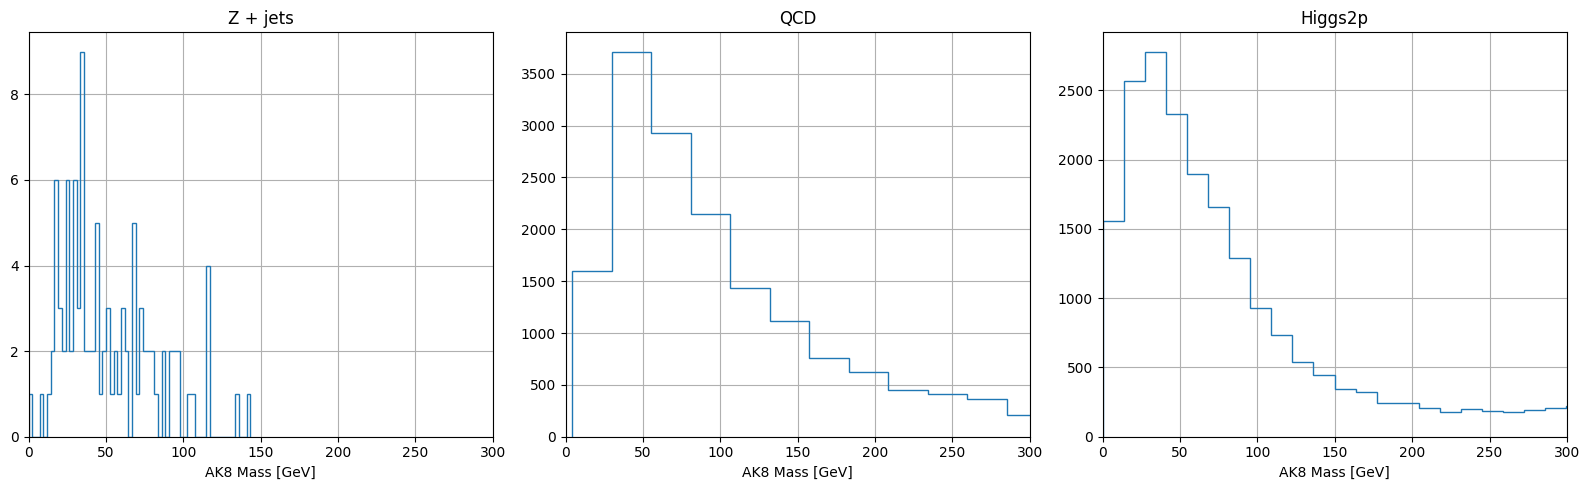

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,5))

# Z+jets
plt.subplot(1,3,1)
plt.hist(mass_z, bins=60, histtype='step')
plt.title("Z + jets")
plt.xlabel("AK8 Mass [GeV]")
plt.xlim(0, 300)
plt.grid(True)

# QCD
plt.subplot(1,3,2)
plt.hist(mass_qcd, bins=60, histtype='step')
plt.title("QCD")
plt.xlabel("AK8 Mass [GeV]")
plt.xlim(0, 300)
plt.grid(True)

# Higgs→2p (H→bb or 2prong)
plt.subplot(1,3,3)
plt.hist(mass_h2p, bins=60, histtype='step')
plt.title("Higgs2p")
plt.xlabel("AK8 Mass [GeV]")
plt.xlim(0, 300)
plt.grid(True)

plt.tight_layout()
plt.show()


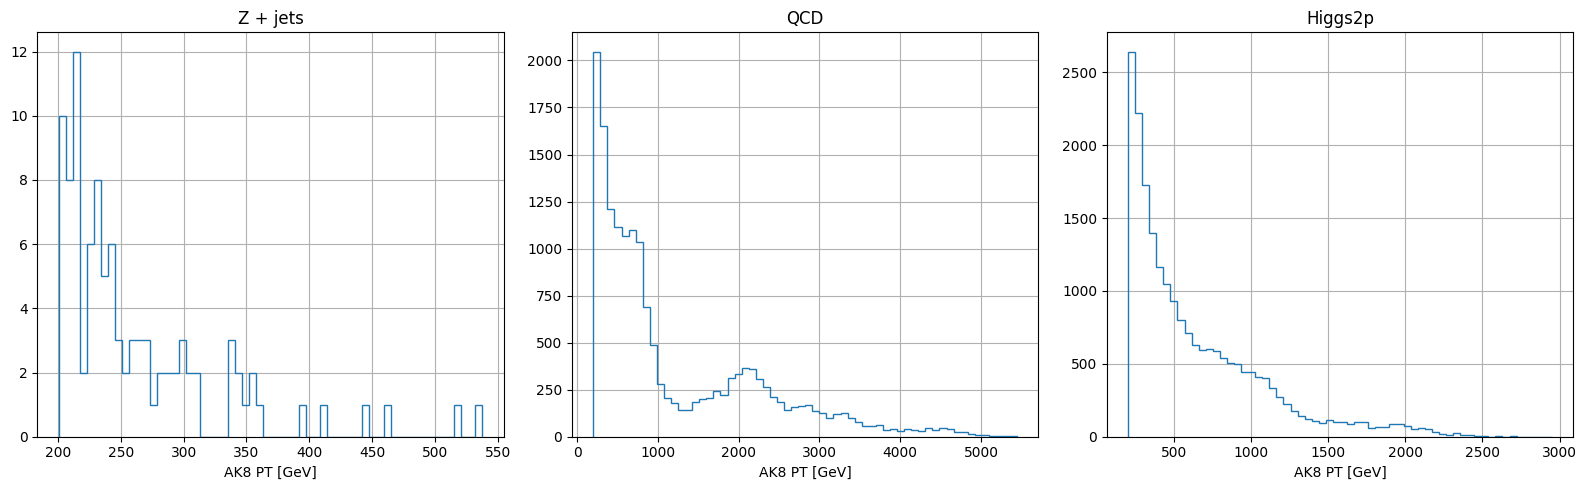

In [40]:
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
plt.hist(pt_z, bins=60, histtype='step')
plt.title("Z + jets")
plt.xlabel("AK8 PT [GeV]")
plt.grid(True)

plt.subplot(1,3,2)
plt.hist(pt_qcd, bins=60, histtype='step')
plt.title("QCD")
plt.xlabel("AK8 PT [GeV]")
plt.grid(True)

plt.subplot(1,3,3)
plt.hist(pt_h2p, bins=60, histtype='step')
plt.title("Higgs2p")
plt.xlabel("AK8 PT [GeV]")
plt.grid(True)

plt.tight_layout()
plt.show()
